In [1]:
import pandas_datareader.data as web
import datetime
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import datetime

In [2]:
import pandas_datareader as web 

btc = web.get_data_yahoo(['BTC-USD'], start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2022, 3, 22))['Close']

print(btc.head())

Symbols          BTC-USD
Date                    
2018-01-01  13657.200195
2018-01-02  14982.099609
2018-01-03  15201.000000
2018-01-04  15599.200195
2018-01-05  17429.500000


In [3]:
btc.to_csv("btc.csv")

In [4]:
btc = pd.read_csv("btc.csv")
print(btc.head())

         Date       BTC-USD
0  2018-01-01  13657.200195
1  2018-01-02  14982.099609
2  2018-01-03  15201.000000
3  2018-01-04  15599.200195
4  2018-01-05  17429.500000


In [5]:
btc.index = pd.to_datetime(btc['Date'], format='%Y-%m-%d')

In [6]:
del btc['Date']

In [16]:
btc.head()

,BTC-USD
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000


In [18]:
import numpy as np

btc['Time'] = np.arange(len(btc.index))

btc.head()

,BTC-USD,Time
Date,,
2018-01-01,13657.200195,0
2018-01-02,14982.099609,1
2018-01-03,15201.000000,2
2018-01-04,15599.200195,3
2018-01-05,17429.500000,4


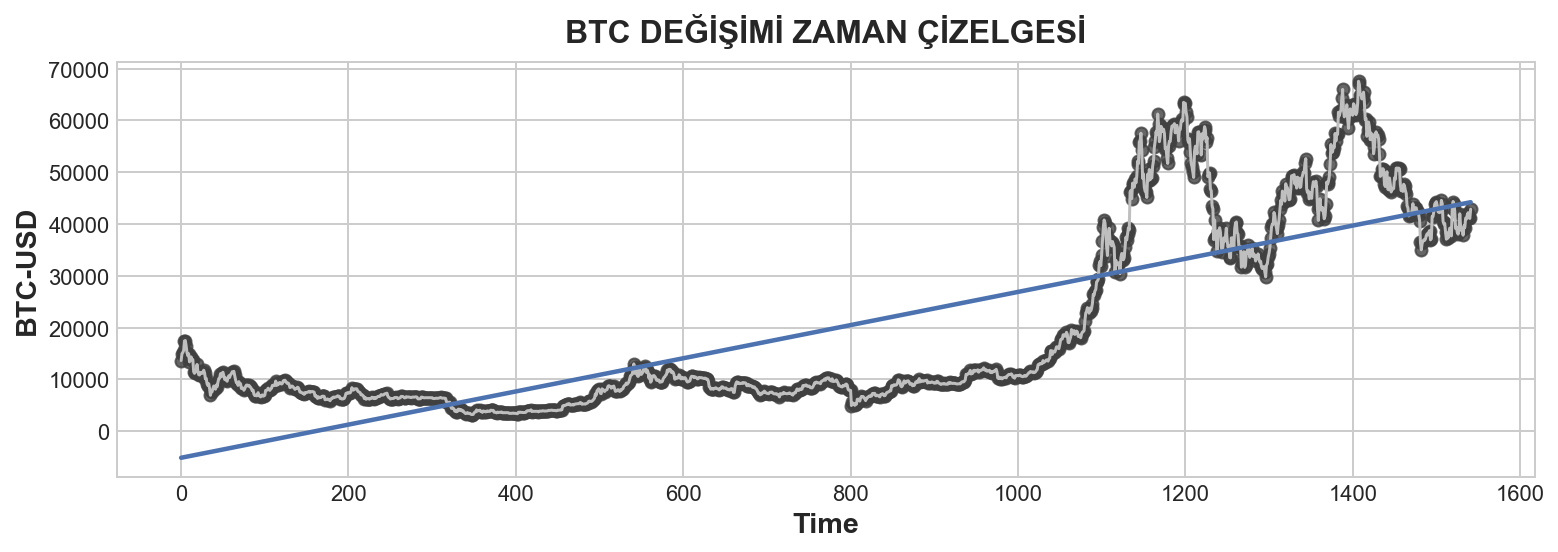

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'BTC-USD', data=btc, color='0.75')
ax = sns.regplot(x='Time', y='BTC-USD', data=btc, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('BTC DEĞİŞİMİ ZAMAN ÇİZELGESİ');

**lag_features**

In [21]:

# Burada 1 adımlı bir gecikme özelliği oluşturduk, ancak birden fazla adımla kaydırmakta mümkündür.

btc['Lag_1'] = btc['BTC-USD'].shift(1)
btc = btc.reindex(columns=['BTC-USD', 'Lag_1'])

btc.head()

,BTC-USD,Lag_1
Date,,
2018-01-01,13657.200195,NaN
2018-01-02,14982.099609,13657.200195
2018-01-03,15201.000000,14982.099609
2018-01-04,15599.200195,15201.000000
2018-01-05,17429.500000,15599.200195


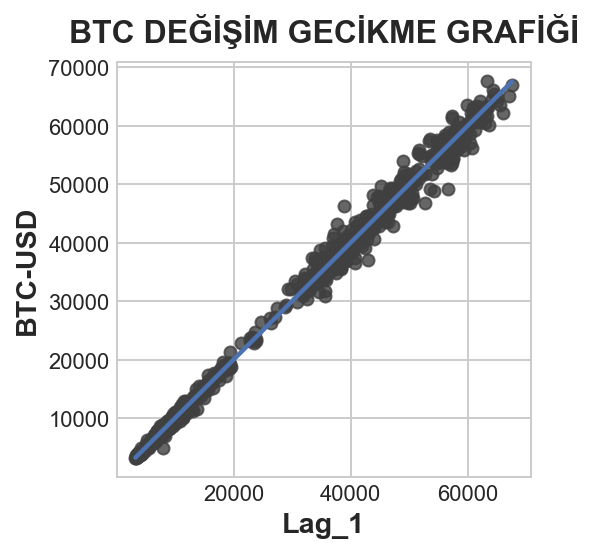

In [23]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='BTC-USD', data=btc, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('BTC DEĞİŞİM GECİKME GRAFİĞİ');

**Uygulama**

In [25]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore") 

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'



data_dir = Path("")
btc = pd.read_csv(data_dir / "btc.csv", parse_dates=["Date"])

# zaman serimizi oluşturalım.
btc = btc.set_index("Date")

btc = btc.to_period()

btc.head()

,BTC-USD
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000


In [27]:
btc = btc.copy()

btc['Time'] = np.arange(len(btc.index))

btc.head()

,BTC-USD,Time
Date,,
2018-01-01,13657.200195,0
2018-01-02,14982.099609,1
2018-01-03,15201.000000,2
2018-01-04,15599.200195,3
2018-01-05,17429.500000,4


In [28]:
# doğrusal regresyonu yine sklearn üzerinden uygulayalım.

from sklearn.linear_model import LinearRegression

# eğitim verileri.
X = btc.loc[:, ['Time']]  # özellik.
y = btc.loc[:, 'BTC-USD']  # görev

# modelin eğitilmesi.
model = LinearRegression()
model.fit(X, y)

# tahmin edilen verileri aynı zaman indeksine sahip bir zaman serisi olarak saklayalım.
y_pred = pd.Series(model.predict(X), index=X.index)

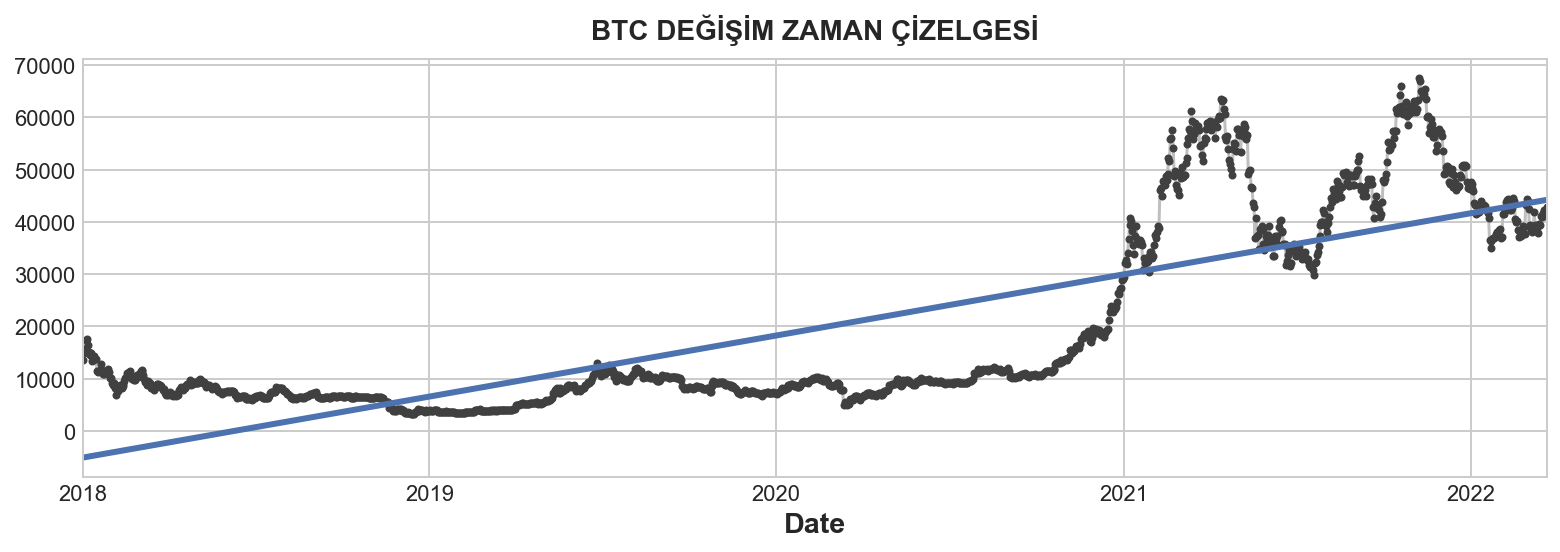

In [29]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('BTC DEĞİŞİM ZAMAN ÇİZELGESİ');

In [30]:
# Şimdi ise lag feature'yi uygulayalım.
# verimiz üzerinde kaydırma yapmak için pandas'ın shift metodunu kullanacağız.

btc['Lag_1'] = btc['BTC-USD'].shift(1)
btc.head()

,BTC-USD,Time,Lag_1
Date,,,
2018-01-01,13657.200195,0,NaN
2018-01-02,14982.099609,1,13657.200195
2018-01-03,15201.000000,2,14982.099609
2018-01-04,15599.200195,3,15201.000000
2018-01-05,17429.500000,4,15599.200195


In [31]:
# lag feature hesaplanırken eksik( NaN ) değerleri ya dolduracağız, ya da sileceğiz.

from sklearn.linear_model import LinearRegression

X = btc.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # eksik değerlerimizi siliyoruz.
y = btc.loc[:, 'BTC-USD']  # görev
y, X = y.align(X, join='inner')  # değer ataması yaptığımız için yani veriyi kaydırdığımız için karşılık gelen değerleri siliyoruz.

# modelin oluşturulması ve eğitimi.
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

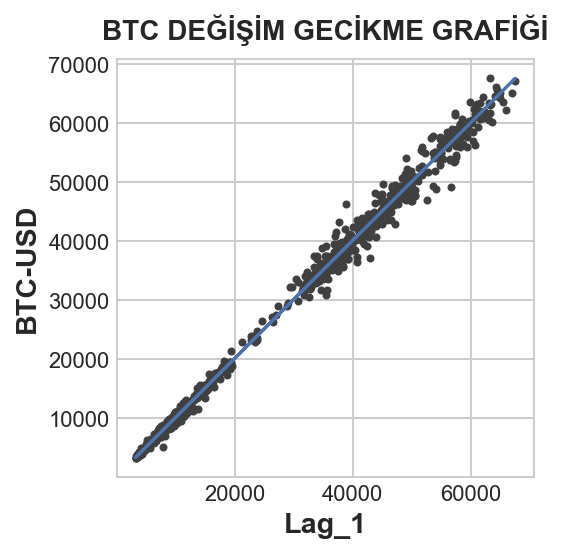

In [32]:
# grafiğimizi oluşturalım.

fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('BTC-USD')
ax.set_xlabel('Lag_1')
ax.set_title('BTC DEĞİŞİM GECİKME GRAFİĞİ');

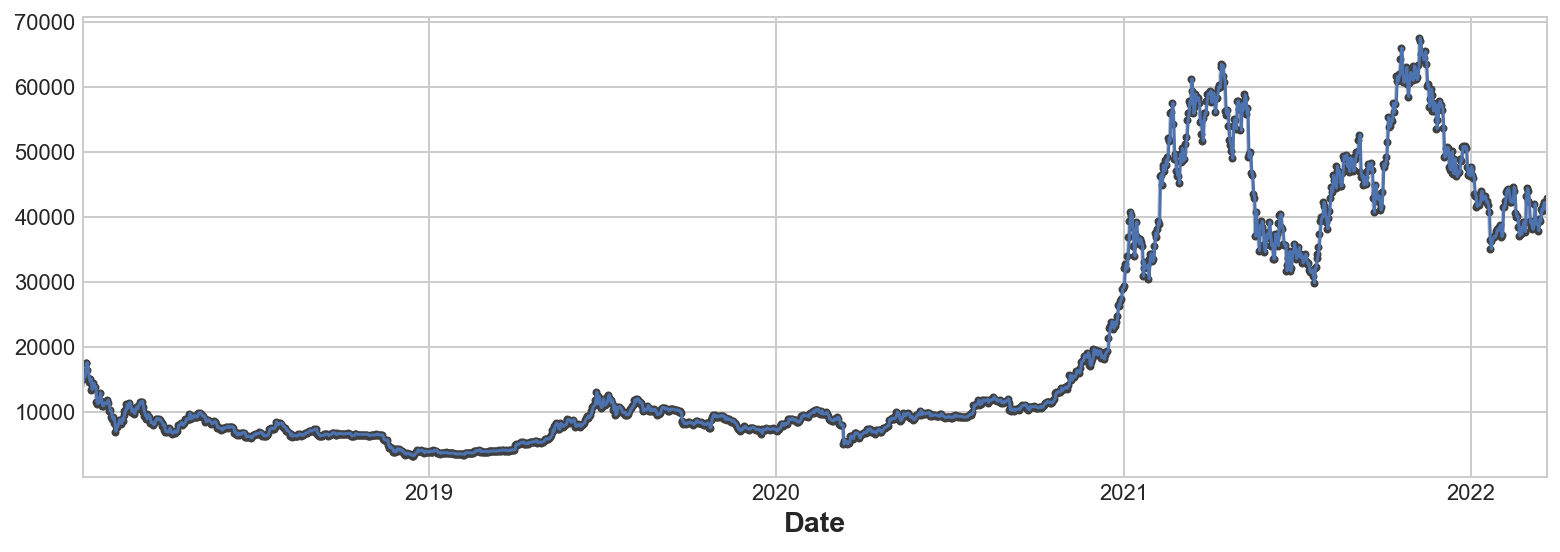

In [33]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

**Uygulama-2**

In [34]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# verisetimizin yüklenmesi.
data_dir = Path("")
btc = pd.read_csv(data_dir / "btc.csv", parse_dates=["Date"])
btc = btc.set_index("Date").to_period()

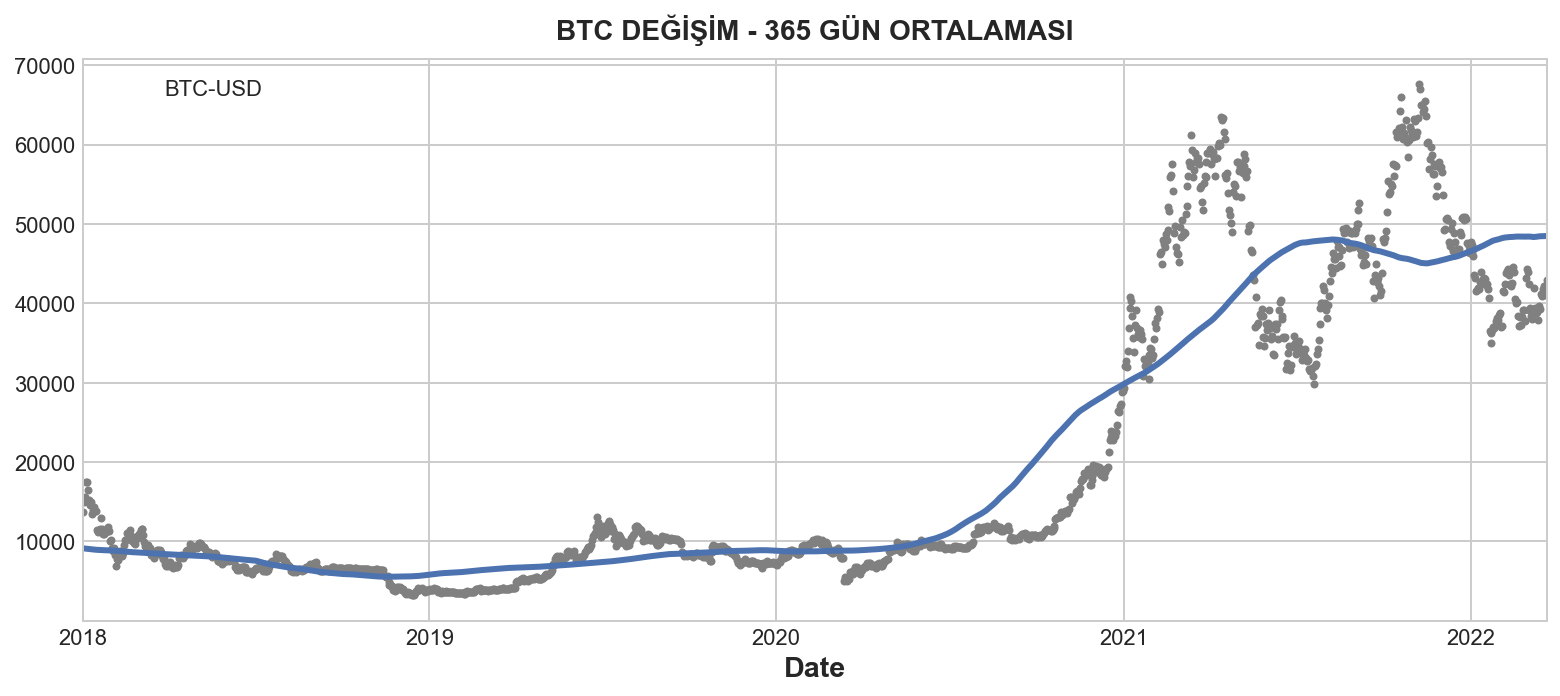

In [36]:
moving_average = btc.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = btc.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="BTC DEĞİŞİM - 365 GÜN ORTALAMASI", legend=False,
);

In [37]:
# birinci bölümde pandas ile tasarladığımız time dummy'lerimizi şimdi statsmodels.tsa.determinictic ile tasarlayacağız.
# bu library zaman serileri ve doğrusal regresyon da meydana gelecek hataları engeller.

from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=btc.index,  # train kümemizden tarihler.
    constant=True,       # y_intercept
    order=1,             # doğrusal için 1, ikinci dereceden için 2, kübik 3 vs. vs.
    drop=True,           
)

X = dp.in_sample()

X.head()

,const,trend
Date,,
2018-01-01,1.0,1.0
2018-01-02,1.0,2.0
2018-01-03,1.0,3.0
2018-01-04,1.0,4.0
2018-01-05,1.0,5.0


In [38]:
from sklearn.linear_model import LinearRegression

y = btc["BTC-USD"]  

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

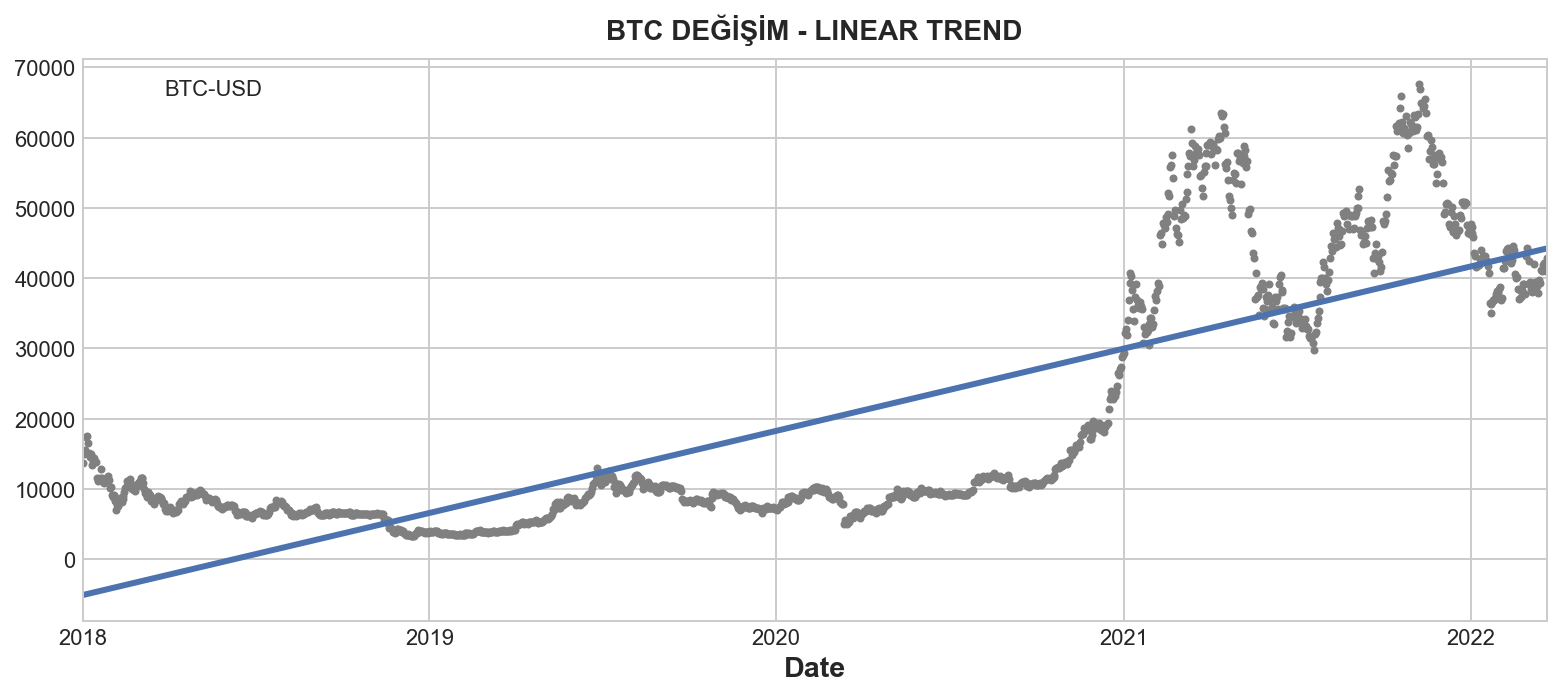

In [40]:
ax = btc.plot(style=".", color="0.5", title="BTC DEĞİŞİM - LINEAR TREND")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

**30 Günlük Tahmin.**

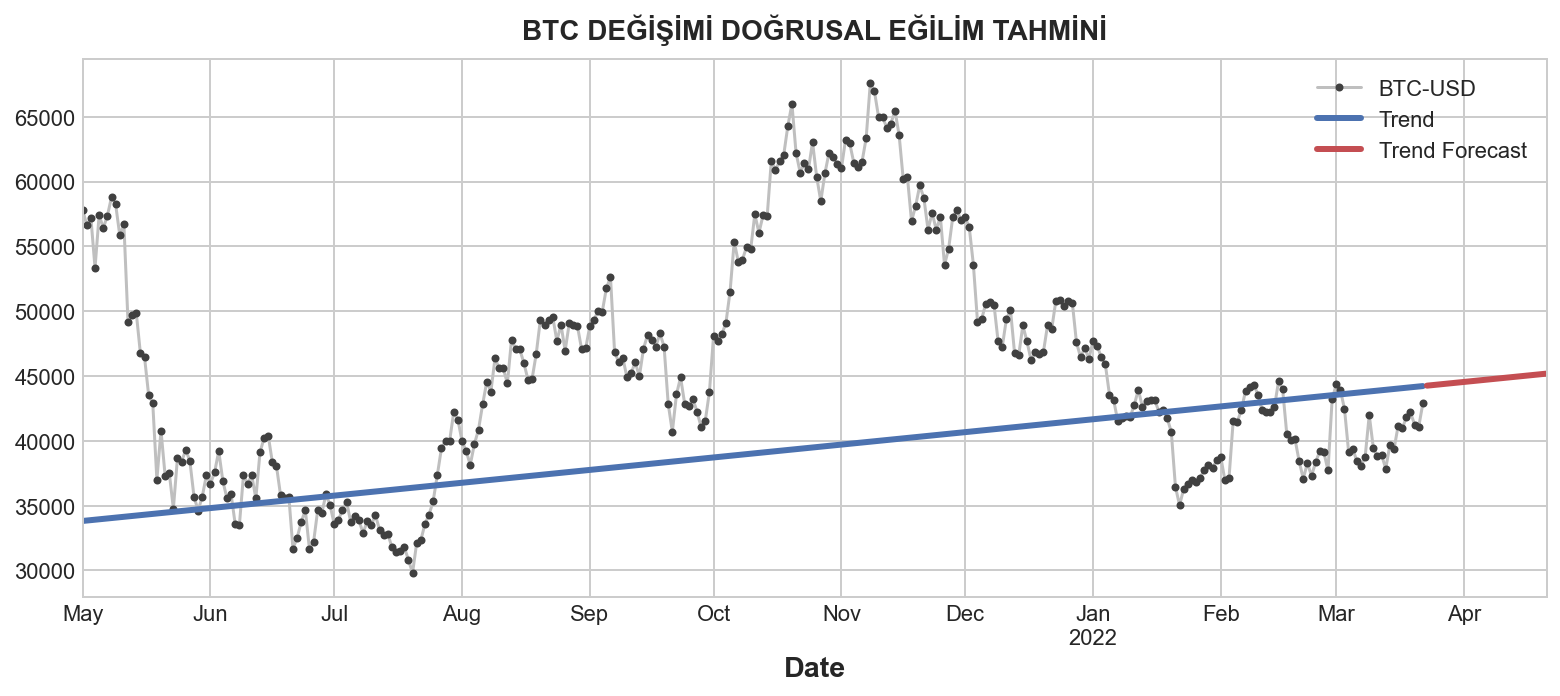

In [41]:
X = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X), index=X.index)

# görselleştirme.
ax = btc["2021-05":].plot(title="BTC DEĞİŞİMİ DOĞRUSAL EĞİLİM TAHMİNİ", **plot_params)
ax = y_pred["2021-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

**Seasonality**

In [42]:
import numpy as np


def fourier_features(index, freq, order):
    time = np.arange(len(index), dtype=np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    for i in range(1, order + 1):
        features.update({
            f"sin_{freq}_{i}": np.sin(i * k),
            f"cos_{freq}_{i}": np.cos(i * k),
        })
    return pd.DataFrame(features, index=index)

**Uygulama-3**

In [56]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


data_dir = Path("")
btc = pd.read_csv(data_dir / "btc.csv", parse_dates=["Date"])
btc = btc.set_index("Date").to_period("D")

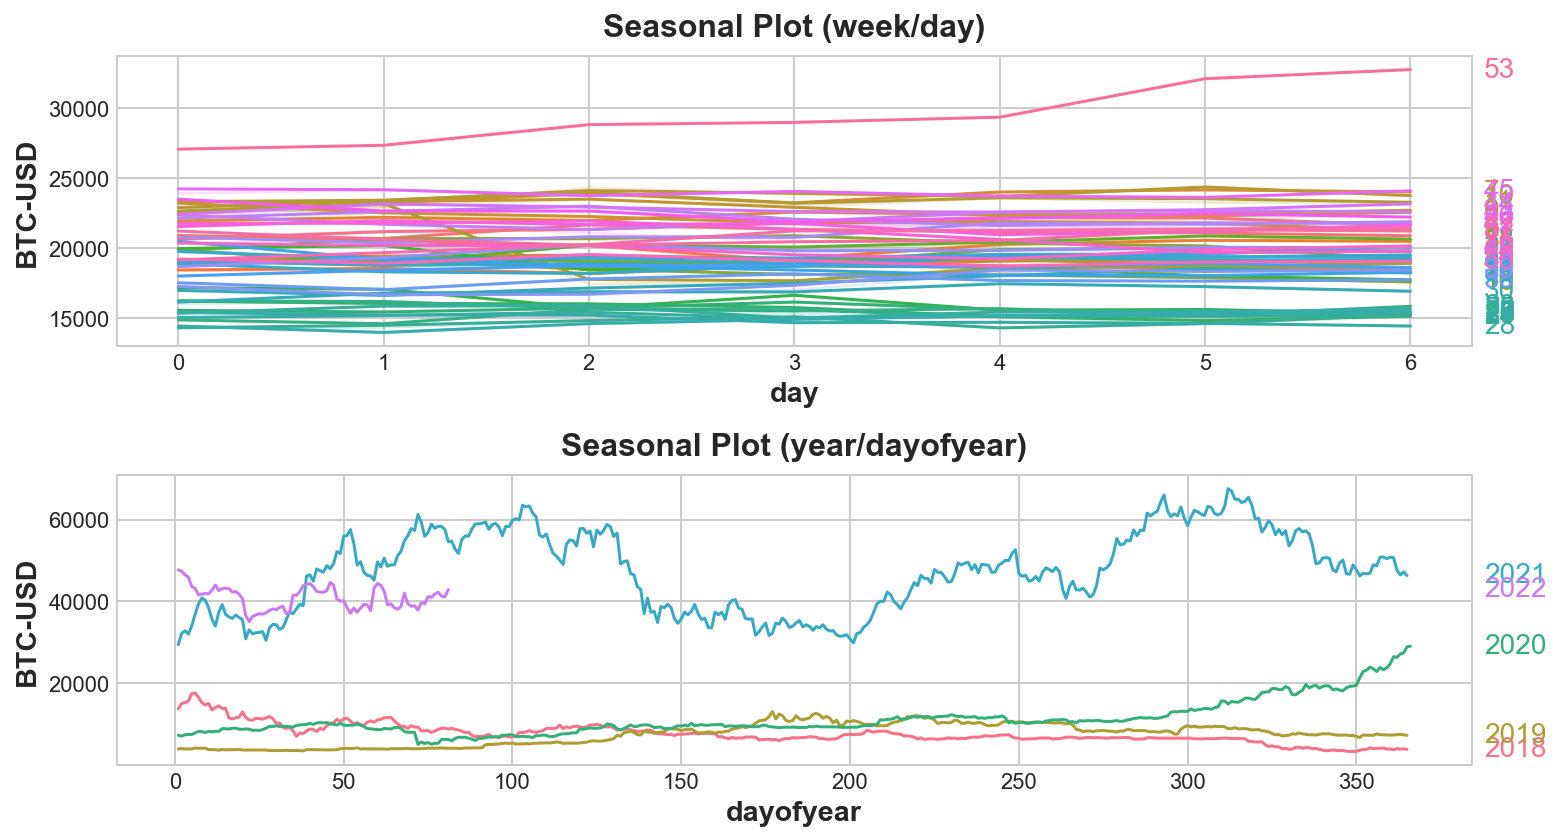

In [57]:
X = btc.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="BTC-USD", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="BTC-USD", period="year", freq="dayofyear", ax=ax1);

In [59]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=btc.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()

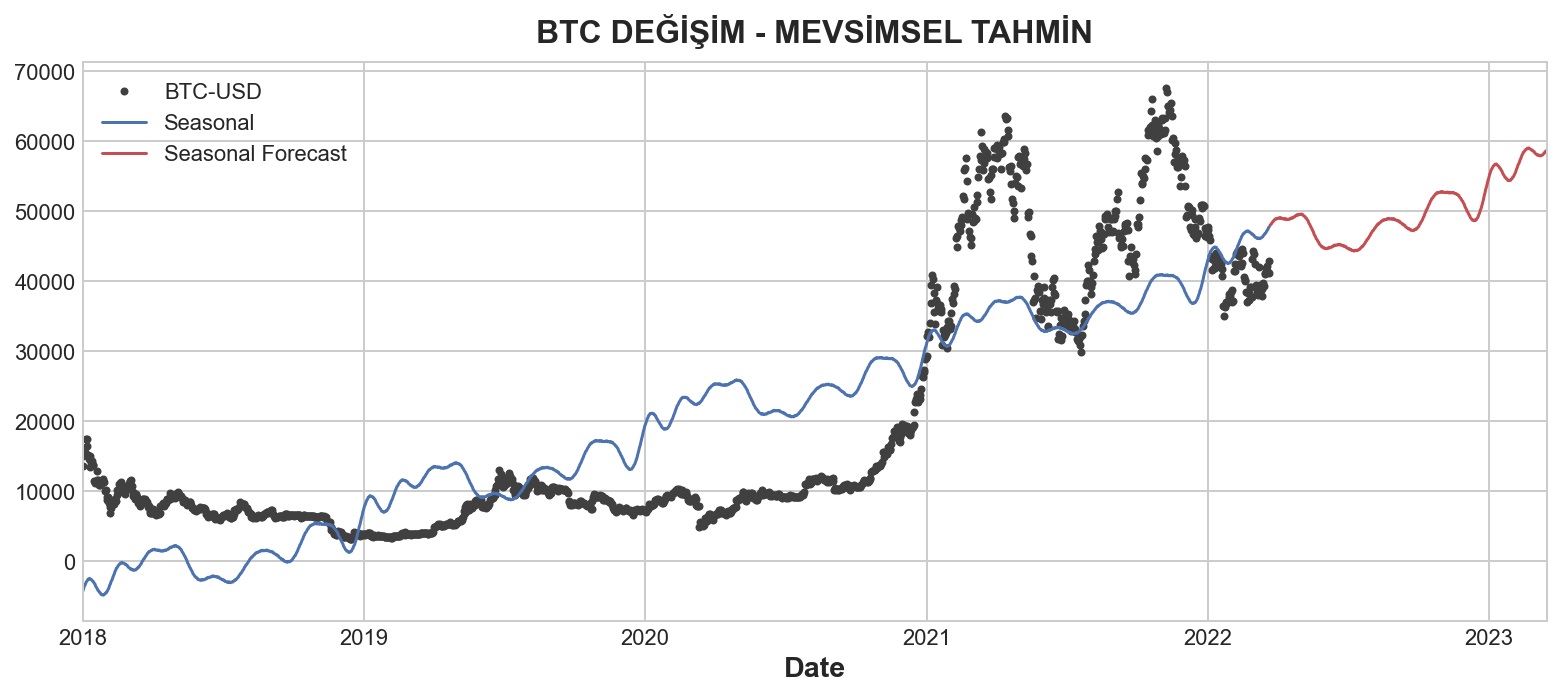

In [62]:
y = btc["BTC-USD"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=360)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="BTC DEĞİŞİM - MEVSİMSEL TAHMİN")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()